In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
x=np.random.uniform(0,1,50)
y=np.random.uniform(0,1,50)

In [3]:
df=pd.DataFrame(columns=['x','y'])

In [4]:
df.x=x
df.y=y

<Axes: xlabel='x', ylabel='y'>

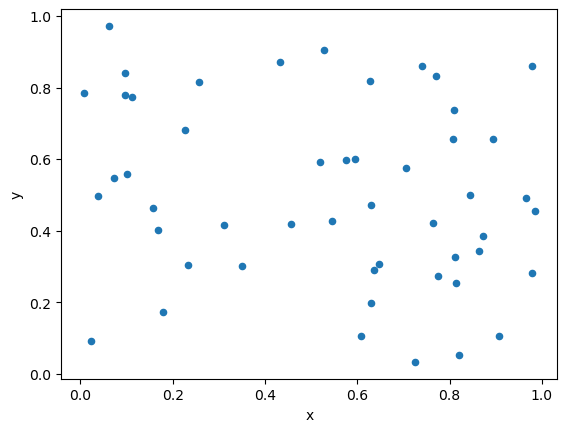

In [5]:
df.plot(x='x',y='y',kind='scatter')

In [6]:
model=KMeans(n_clusters=3).fit(df)

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
model.labels_

array([0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 1])

<Axes: xlabel='x', ylabel='y'>

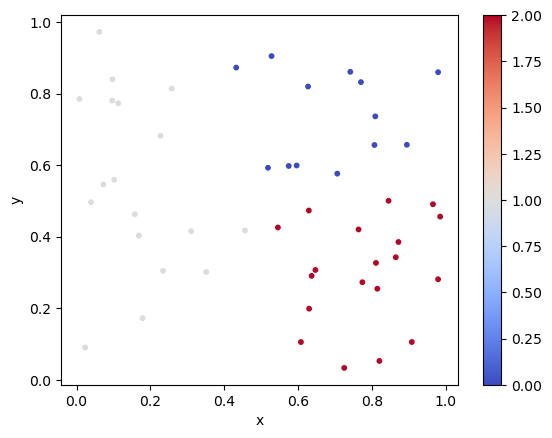

In [8]:
df.plot(x='x',y='y',c=model.labels_,kind='scatter',s=10,cmap=plt.cm.coolwarm)

In [9]:
df_new=pd.read_csv('University_Clustering.csv')

In [10]:
df_new.head(2)

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81


In [11]:
df_new=df_new.drop(['State'],axis=1)

In [12]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [13]:
df_norm=norm_func(df_new.iloc[:,1:])

In [14]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [15]:
TWSS=[]
k=list(range(2,8))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

In [16]:
TWSS

[4.123452442397179,
 2.9556843285735446,
 2.2308047771916275,
 1.7235908583892827,
 1.4358167122481662,
 1.2329501550947162]

Text(0, 0.5, 'total_withing_ss')

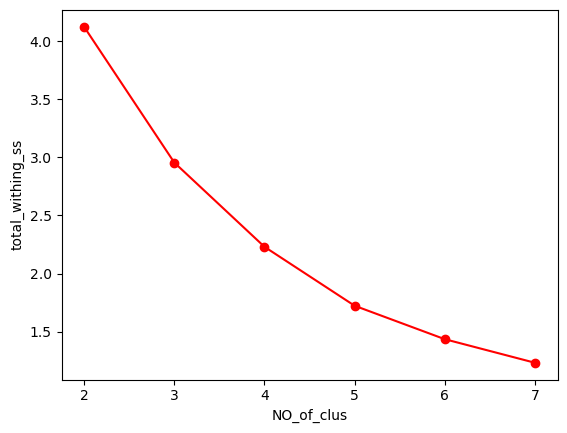

In [17]:
plt.plot(k,TWSS,'ro-');
plt.xlabel('NO_of_clus')
plt.ylabel('total_withing_ss')

In [18]:
mode=KMeans(n_clusters=3)

In [19]:
model.fit(df_norm)

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
model.labels_

array([2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 0])

In [21]:
mb=pd.Series(model.labels_)

In [22]:
df_norm['Cluster']=mb
df_norm.shape

(25, 7)

In [23]:
df_norm=df_norm.iloc[:,[6,0,1,2,3,4,5]]

In [28]:
df_norm.iloc[:,0:].groupby(df_norm.Cluster).mean()

,Cluster,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,,
0,0.0,0.887195,0.869792,0.126645,0.177632,0.613655,0.829167
1,1.0,0.266667,0.263889,0.708333,0.578947,0.085303,0.233333
2,2.0,0.658537,0.753788,0.275120,0.358852,0.281058,0.763636
